Загрузите данные по изменению температуры поверхности земли. Для этого может понадобится зарегистрироваться на Kaggle. Затем нужно будет работать с данными, которые содержатся в файле GlobalLandTemperaturesByMajorCity.csv

In [162]:
import zipfile

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

with zipfile.ZipFile("archive.zip") as z:
    with z.open("GlobalLandTemperaturesByMajorCity.csv") as f:
        df = pd.read_csv(f, parse_dates=["dt"])

df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


Задание 3.1 (1 балл)
В последующих заданиях будут учитываться данные начиная с 01.01.1950. Для этого создайте новый DataFrame, в котором удалены все строки до 01.01.1950. Используйте созданный DataFrame в последующих заданиях.

In [163]:
df_1950 = df[df["dt"] >= "1950-01-01"]
print('-----------------------------------------------------------','\nЗадача 1：')
df_1950.head()


----------------------------------------------------------- 
Задача 1：


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
1212,1950-01-01,26.773,0.239,Abidjan,Côte D'Ivoire,5.63N,3.23W
1213,1950-02-01,27.527,0.348,Abidjan,Côte D'Ivoire,5.63N,3.23W
1214,1950-03-01,28.344,0.431,Abidjan,Côte D'Ivoire,5.63N,3.23W
1215,1950-04-01,27.830,0.467,Abidjan,Côte D'Ivoire,5.63N,3.23W
1216,1950-05-01,26.896,0.248,Abidjan,Côte D'Ivoire,5.63N,3.23W


Задание 3.2 (2 балла)
Постройте график среднегодовых температур в городе Торонто.

C:\Users\bshsb\AppData\Local\Temp\ipykernel_1516\2368375805.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Toronto['dt'] = pd.to_datetime(df_Toronto['dt'])
C:\Users\bshsb\AppData\Local\Temp\ipykernel_1516\2368375805.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Toronto['dt'] = df['dt'].dt.year


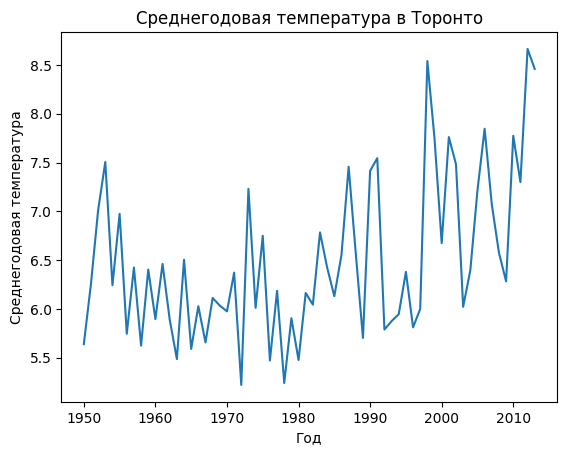

,dt,AverageTemperature
0,1950,5.639583
1,1951,6.259083
2,1952,7.013417
3,1953,7.506250
4,1954,6.243083
...,...,...
59,2009,6.282583
60,2010,7.774500
61,2011,7.299583
62,2012,8.664667


In [164]:
# Получим список значений температуры в Торонто
df_Toronto= df_1950[df_1950["City"] == "Toronto"]
df_Toronto['dt'] = pd.to_datetime(df_Toronto['dt'])


df_Toronto['dt'] = df['dt'].dt.year
df_Toronto= df_Toronto.groupby('dt')['AverageTemperature'].mean().reset_index()

plt.plot(df_Toronto['dt'], df_Toronto['AverageTemperature'])
plt.xlabel('Год')
plt.ylabel('Среднегодовая температура')
plt.title('Среднегодовая температура в Торонто')
plt.show()

df_Toronto



Задание 3.3 (2 балла)
Найдите город, для которого выборочная дисперсия температур на приведенных данных максимальна.

In [165]:
3.3

# Вычисление выборочной дисперсии по группам
variance = df_1950.groupby('City')['AverageTemperature'].var()

# Нахождение города с максимальной выборочной дисперсией
city_max_variance = variance.idxmax()

print("Город с максимальной выборочной дисперсией температур:", city_max_variance)

Город с максимальной выборочной дисперсией температур: Harbin


Задание 3.4 (4 балла)
На одной оси постройте графики, отображающие:
1.Зависимость выборочной дисперсии температур от широты города (Latitude).
2.Зависимость средней температуры в январе 1975 года от широты города (Latitude).
3.Зависимость средней температуры в июле 1975 года от широты города (Latitude).

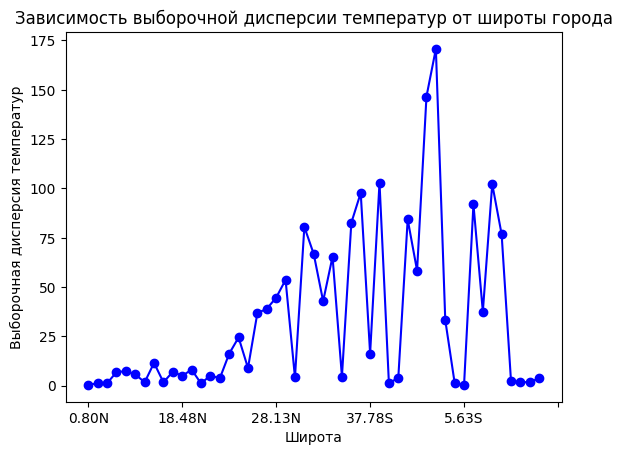

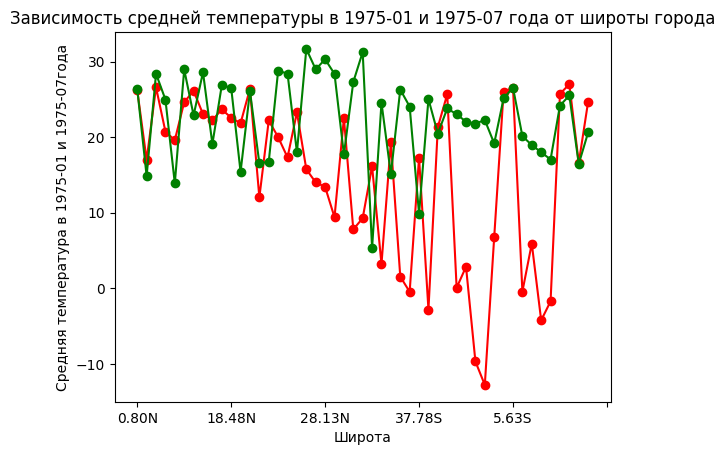

In [166]:
#3.4.1
# 1. Зависимость выборочной дисперсии температур от широты города
variance = df_1950.groupby('Latitude')['AverageTemperature'].var()
variance.plot(marker='o', linestyle='-', color='blue')
plt.xlabel('Широта')
plt.ylabel('Выборочная дисперсия температур')
plt.title('Зависимость выборочной дисперсии температур от широты города')
plt.show()
#2. Зависимость средней температуры в январе 1975 года от широты города

january_temp = df_1950[df_1950['dt'] == '1975-01-01']
january_mean_temp = january_temp.groupby('Latitude')['AverageTemperature'].mean()
january_mean_temp.plot(marker='o', linestyle='-', color='red')
plt.xlabel('Широта')
plt.ylabel('Средняя температура в январе 1975.01 года')
plt.title('Зависимость средней температуры в 1975.01 года от широты города')


#Зависимость средней температуры в июле 1975 года от широты города
january_temp = df_1950[df_1950['dt'] == '1975-07-01']
january_mean_temp = january_temp.groupby('Latitude')['AverageTemperature'].mean()
january_mean_temp.plot(marker='o', linestyle='-', color='green')
plt.xlabel('Широта')
plt.ylabel('Средняя температура в 1975-01 и 1975-07года')
plt.title('Зависимость средней температуры в 1975-01 и 1975-07 года от широты города')

plt.show()


Задание 3.5 (6 баллов) 
Посчитайте данные по среднегодовой температуре в Санкт-Петербурге. Определите года, в которых средняя температура была выше, чем в предыдущем и последующем году. Постройте график среднегодовой температуры и обозначьте на нём найденные года (произвольным образом) 
Постройте модель линейной регрессии (можно использовать LinearRegression); г о д — с р е д н я ят е м п е р а т у р а Отобразите прямую на предыдущем графике.

In [99]:
df_Saint_Petersburg= df_1950[df_1950["City"] == "Saint Petersburg"]


import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression



df_Saint_Petersburg.head()



,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
195915,1950-01-01,-13.053,0.665,Saint Petersburg,Russia,60.27N,29.19E
195916,1950-02-01,-5.829,0.255,Saint Petersburg,Russia,60.27N,29.19E
195917,1950-03-01,-2.812,0.398,Saint Petersburg,Russia,60.27N,29.19E
195918,1950-04-01,5.366,0.384,Saint Petersburg,Russia,60.27N,29.19E
195919,1950-05-01,8.655,0.300,Saint Petersburg,Russia,60.27N,29.19E


C:\Users\bshsb\AppData\Local\Temp\ipykernel_1516\1711601425.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Saint_Petersburg["mean_temperature"] = df_Saint_Petersburg["AverageTemperature"].mean()
C:\Users\bshsb\AppData\Local\Temp\ipykernel_1516\1711601425.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Saint_Petersburg['dt'] = pd.to_datetime(df_Saint_Petersburg['dt'])
C:\Users\bshsb\AppData\Local\Temp\ipykernel_1516\1711601425.py:15: SettingWithCopyWarning: 
A value is trying to be set on a c

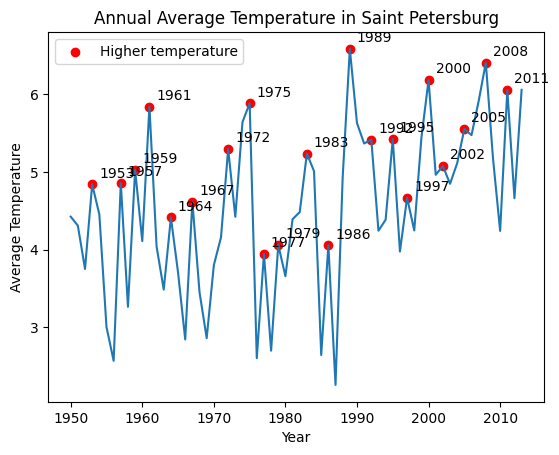

In [100]:
# 计算平均气温
df_Saint_Petersburg["mean_temperature"] = df_Saint_Petersburg["AverageTemperature"].mean()

import pandas as pd
import matplotlib.pyplot as plt



# 将日期字段转换为Datetime类型
df_Saint_Petersburg['dt'] = pd.to_datetime(df_Saint_Petersburg['dt'])

# 提取年份字段
df_Saint_Petersburg['year'] = df_Saint_Petersburg['dt'].dt.year

average_temperatures = df_Saint_Petersburg.groupby('year')['AverageTemperature'].mean()

# 找出平均气温高于前一年和后一年的年份
higher_temperatures = average_temperatures[(average_temperatures.shift() < average_temperatures) &
                                           (average_temperatures.shift(-1) < average_temperatures)]


# 绘制年平均气温曲线图

for year in higher_temperatures.index:
    temperature = higher_temperatures[year]
    plt.annotate(str(year), xy=(year, temperature), xytext=(5, 5), textcoords='offset points')

plt.plot(average_temperatures.index, average_temperatures.values)
plt.scatter(higher_temperatures.index, higher_temperatures.values, color='r', label='Higher temperature')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Annual Average Temperature in Saint Petersburg')
plt.legend()
plt.show()





Задание 3.6 (4 балла)
Найдите города, для которых:
1.Разница между максимальным и минимальным значением среднегодовой температуры в выборке максимальна.
2.Самая большая средняя разница между средней температурой января и средней температурой июля.
3.Наибольшее среднее количество месяцев с отрицательной температурой в году.

In [101]:
df_1950

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
1212,1950-01-01,26.773,0.239,Abidjan,Côte D'Ivoire,5.63N,3.23W
1213,1950-02-01,27.527,0.348,Abidjan,Côte D'Ivoire,5.63N,3.23W
1214,1950-03-01,28.344,0.431,Abidjan,Côte D'Ivoire,5.63N,3.23W
1215,1950-04-01,27.830,0.467,Abidjan,Côte D'Ivoire,5.63N,3.23W
1216,1950-05-01,26.896,0.248,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E


In [168]:
import pandas as pd
import numpy as np

# 计算每个城市年平均气温的差异
df_1950['Year'] = pd.to_datetime(df_1950['dt']).dt.year
mean_temp_by_year = df_1950.groupby(['City', 'Year'])['AverageTemperature'].mean().reset_index()

df['Annual Mean Difference'] = mean_temp_by_year.groupby('City')['AverageTemperature'].diff().abs().max()
# 找到年平均气温差异最大的城市
max_mean_diff_city = df.groupby('City')['Annual Mean Difference'].idxmax()
max_mean_diff_city = df.loc[max_mean_diff_city]['City'].values[0]
print("Разница между максимальным и минимальным значением среднегодовой температуры в выборке максимальна：" + max_mean_diff_city)


# 计算每个城市一月和七月平均气温的差异
df_1950['Month'] = pd.to_datetime(df_1950['dt']).dt.month
jan_avg_temp = df_1950[df_1950['Month'] == 1].groupby('City')['AverageTemperature'].mean()
jul_avg_temp = df_1950[df_1950['Month'] == 7].groupby('City')['AverageTemperature'].mean()

# 将一月和七月平均气温的差异存储到一个 DataFrame 中
temp_diff_df = pd.DataFrame({
    'City': jan_avg_temp.index,
    'Jan Average Temperature': jan_avg_temp.values,
    'Jul Average Temperature': jul_avg_temp.values,
    'Temp Difference': jan_avg_temp.values - jul_avg_temp.values
})

# 找到一月和七月平均气温差异最大的城市
max_temp_diff_city = temp_diff_df.loc[temp_diff_df['Temp Difference'].idxmax()]['City']
print("Самая большая средняя разница между средней температурой января и средней температурой июля：" + max_temp_diff_city)


# 添加年份列
df_1950['Year'] = pd.to_datetime(df_1950['dt']).dt.year

# 选取平均气温小于0的数据
negative_temps = df_1950[df_1950['AverageTemperature'] < 0]

# 统计每个城市每年的负气温月份数
result = negative_temps.groupby(['Year', 'City']).size().reset_index(name='NegativeMonths')

# 找到每年出现负气温平均月数最多的城市
most_negative_city_per_year = result.groupby('Year').apply(lambda x: x.loc[x['NegativeMonths'].idxmax()]['City']).reset_index(name='MostNegativeCity')

# 找到每年出现负气温平均月数最多的城市名
most_negative_city = most_negative_city_per_year.groupby('MostNegativeCity').size().idxmax()

# 输出结果
print('Наибольшее среднее количество месяцев с отрицательной температурой в году: '+most_negative_city)

Разница между максимальным и минимальным значением среднегодовой температуры в выборке максимальна：Abidjan
Самая большая средняя разница между средней температурой января и средней температурой июля：Santiago
Наибольшее среднее количество месяцев с отрицательной температурой в году: Changchun


C:\Users\bshsb\AppData\Local\Temp\ipykernel_1516\4101549485.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1950['Year'] = pd.to_datetime(df_1950['dt']).dt.year
C:\Users\bshsb\AppData\Local\Temp\ipykernel_1516\4101549485.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1950['Month'] = pd.to_datetime(df_1950['dt']).dt.month
C:\Users\bshsb\AppData\Local\Temp\ipykernel_1516\4101549485.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

Задание 3.7 (3 балла)
Отобразите города на карте, например с помощью geopandas/folium или plotly. Причем цвет метки должен соответствовать средней температуре в январе за последние 10 лет.

***(+3 балла). Вычислите прямую с "трендом" по изменению средней температуры за год в каждом городе в период 1950-2013 (можно с помощью линейной регрессии, как в задании 3.5**). Отобразите города цветом, который зависит от угла наклона этой прямой.

*****(+1 балл) В дополнение к предыдущему пункту, используйте библиотеку pwlf с фиксированным числом сегментов и визуализируйте угол наклона последнего сегмента.

In [198]:
df_1950

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year,Month
1212,1950-01-01,26.773,0.239,Abidjan,Côte D'Ivoire,5.63N,3.23W,1950,1
1213,1950-02-01,27.527,0.348,Abidjan,Côte D'Ivoire,5.63N,3.23W,1950,2
1214,1950-03-01,28.344,0.431,Abidjan,Côte D'Ivoire,5.63N,3.23W,1950,3
1215,1950-04-01,27.830,0.467,Abidjan,Côte D'Ivoire,5.63N,3.23W,1950,4
1216,1950-05-01,26.896,0.248,Abidjan,Côte D'Ivoire,5.63N,3.23W,1950,5
...,...,...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E,2013,5
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E,2013,6
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E,2013,7
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E,2013,8


In [212]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from folium import Map, Marker

data = df_1950[df_1950["dt"] >='2004-01-01	']

data=data[data['Month']==1]

data["january_temperature"] = data.groupby('City')['AverageTemperature'].mean()
data

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year,Month,january_temperature
1860,2004-01-01,27.728,0.289,Abidjan,Côte D'Ivoire,5.63N,3.23W,2004,1,NaN
1872,2005-01-01,26.715,0.426,Abidjan,Côte D'Ivoire,5.63N,3.23W,2005,1,NaN
1884,2006-01-01,27.596,0.505,Abidjan,Côte D'Ivoire,5.63N,3.23W,2006,1,NaN
1896,2007-01-01,27.120,0.512,Abidjan,Côte D'Ivoire,5.63N,3.23W,2007,1,NaN
1908,2008-01-01,26.061,0.762,Abidjan,Côte D'Ivoire,5.63N,3.23W,2008,1,NaN
...,...,...,...,...,...,...,...,...,...,...
239120,2009-01-01,-1.516,0.425,Xian,China,34.56N,108.97E,2009,1,NaN
239132,2010-01-01,-0.237,0.554,Xian,China,34.56N,108.97E,2010,1,NaN
239144,2011-01-01,-4.811,0.559,Xian,China,34.56N,108.97E,2011,1,NaN
239156,2012-01-01,-2.416,0.568,Xian,China,34.56N,108.97E,2012,1,NaN


In [226]:
import pandas as pd
import folium
from sklearn.linear_model import LinearRegression
import pwlf



# 清理数据中的非数字字符
data['Latitude'] = data['Latitude'].astype(str).replace('N', '')
data['Longitude'] = data['Longitude'].astype(str).replace('W', '')
data['Latitude'] = data['Latitude'].astype(str).replace('S', '')
data['Longitude'] = data['Longitude'].astype(str).replace('E', '')
# 将 Avg_Temp_Jan 列转换为浮点数
data['Latitude'] = data['Latitude'].astype(float)
data['Longitude'] = data['Longitude'].astype(float)


# 创建地图
m = folium.Map(location=[0, 0], zoom_start=2)

# 颜色渐变
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'gray']

# 对于每个城市
for index, row in data.iterrows():
    city = row['City']
    temp = row['AverageTemperature']
    
    # 确定标记的颜色
    color = colors[min(int(temp // 10), len(colors) - 1)]
    
    # 在地图上添加标记
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        icon=folium.Icon(color=color),
        popup=f"{city}: {temp}°C"
    ).add_to(m)
    
# 计算年平均气温变化趋势直线
X = data['Year'].values.reshape(-1, 1)
Y = data['AverageTemperature'].values.reshape(-1, 1)
regression = LinearRegression().fit(X, Y)
slope = regression.coef_[0][0]

# 使用pwlf库计算最后一个段的斜率
data = data.sort_values('Year')
x = data['Year']
y = data['AverageTemperature']
my_pwlf = pwlf.PiecewiseLinFit(x, y)
my_pwlf.fit(2)  # 设置2个段
slope_last_segment = my_pwlf.slopes[-1]
# 打印结果
print(f"年平均气温变化趋势：{slope}")
print(f"最后一个段的斜率：{slope_last_segment}")

# 显示地图
m


C:\Users\bshsb\AppData\Local\Temp\ipykernel_1516\473331433.py:35: UserWarning: color argument of Icon should be one of: {'red', 'beige', 'lightblue', 'lightred', 'cadetblue', 'lightgreen', 'white', 'purple', 'green', 'darkgreen', 'blue', 'darkpurple', 'gray', 'lightgray', 'darkblue', 'pink', 'black', 'orange', 'darkred'}.
  icon=folium.Icon(color=color),


年平均气温变化趋势：-0.0460447878787876
最后一个段的斜率：-0.09781748474866764
